## Download the file in colab

In [1]:
import gdown

# Replace '1OtNYhw3xc04qIj0Y-McrDJ0XCkx5lXRz' with your file key
file_id = '1fOwmnF25IbW6hh55h4hyWHviw8kR7fVM'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'final_dataset.csv'  # Provide the filename and extension you want

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1fOwmnF25IbW6hh55h4hyWHviw8kR7fVM
From (redirected): https://drive.google.com/uc?id=1fOwmnF25IbW6hh55h4hyWHviw8kR7fVM&confirm=t&uuid=71308afa-b26c-4117-9fd0-df55d65ec3c4
To: /content/final_dataset.csv
100%|██████████| 165M/165M [00:01<00:00, 90.4MB/s]


'final_dataset.csv'

In [6]:
import pandas as pd
df = pd.read_csv("/content/final_dataset.csv")

## Importing the dataset

In [7]:
# Check for missing values and data types
print(df.isnull().sum())
print(df.dtypes)
df['transaction_date_time'] = pd.to_datetime(df['transaction_date_time'])
numeric_df = df.select_dtypes(include=['float64', 'int64'])

transaction_date_time                  0
amount                                 0
fee_amount                             0
receiver_credit_amount                 0
sender_debit_amount                    0
depositor_running_balance              0
withdrawer_running_balance             0
from_account                           0
to_account                             0
transaction_type                       0
sender_before_transaction_balance      0
sender_account_type                    0
receiver_account_type                  0
receiver_before_transaction_balance    0
is_anomaly                             0
dtype: int64
transaction_date_time                   object
amount                                 float64
fee_amount                             float64
receiver_credit_amount                 float64
sender_debit_amount                    float64
depositor_running_balance              float64
withdrawer_running_balance             float64
from_account                             in

In [8]:
transaction_type = df["transaction_type"].value_counts()
transactions = transaction_type.index
quantity = transaction_type.values

import plotly.express as px
figure = px.pie(df,
                values=quantity,
                names=transactions,hole = 0.5,
                title="Distribution of Trasaction Type")
figure.show()

## Transaction amount distribution

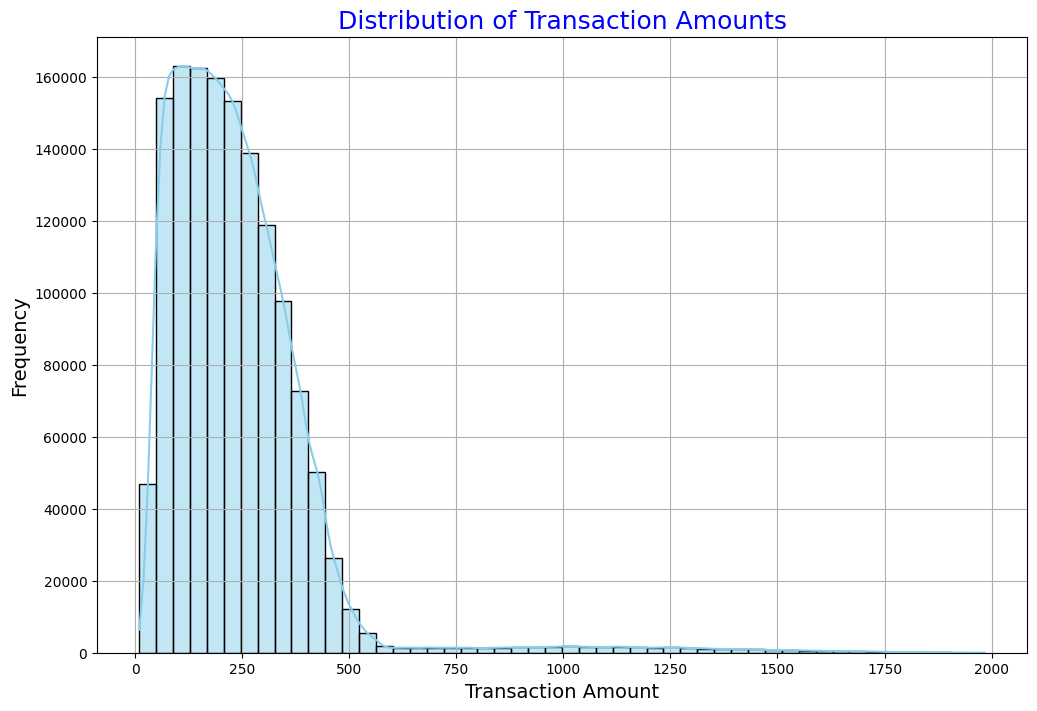

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.core.display import display, HTML


display(HTML("""
<h3 style='color:blue;'>Distribution of Transaction Amounts</h3>
<p>The following histogram displays the distribution of transaction amounts in the dataset. The blue bars represent the frequency of transactions, while the overlaid orange line represents the KDE (Kernel Density Estimate), helping us see the distribution pattern of the data more smoothly.</p>
"""))

# Enhanced histogram with KDE for transaction amounts
plt.figure(figsize=(12, 8))
sns.histplot(df['amount'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts', fontsize=18, color='blue')
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


Heatmap

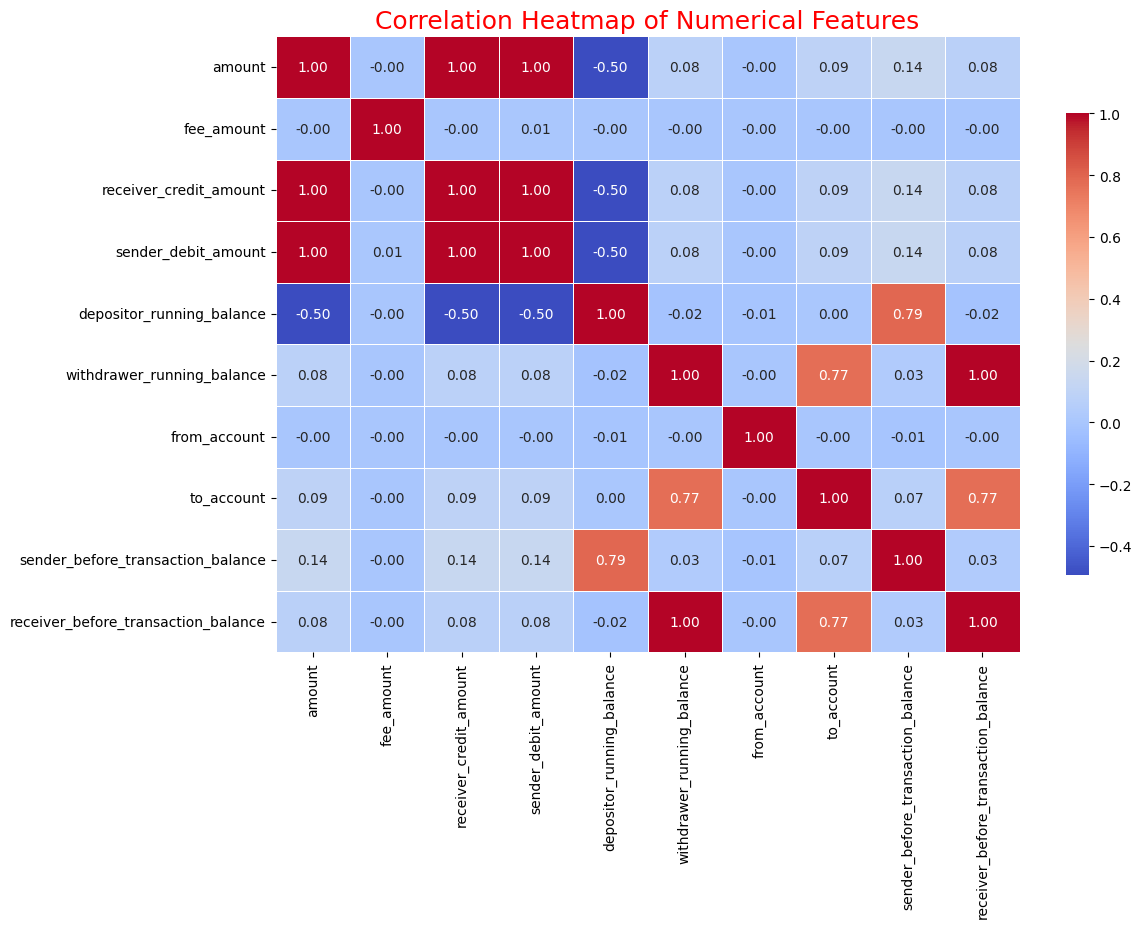

In [11]:
# HTML explanation
display(HTML("""
<h3 style='color:red;'>Correlation Heatmap</h3>
<p>This heatmap visualizes the correlation between different numerical features in the dataset. Strong positive or negative correlations between features may indicate interesting relationships that could be explored further in anomaly detection.</p>
"""))

# Plot a correlation heatmap for numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap of Numerical Features', fontsize=18, color='red')
plt.show()
